<a href="https://colab.research.google.com/github/LucasAlbFar/analise_dados_hepatite_brasil/blob/main/notebooks/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJETO DE ANÁLISE DOS DADOS SOBRE HEPATITE NO BRASIL**

***


Este projeto propõe realizar uma análise exploratória dos dados relacionados com os vários tipos de hepatites, como óbitos, vacinação e gastos em hospitaos da rede pública de saúde em caso de óbitos decorrentes desta enfermidade, além de relacionar os dados de tamanho da poupução brasieira ao longo do período estudado. Todos os dados foram extraídos do sistema TABNET/DATASUS diponibilizado pelo Governo Federal.

**Atenção:**
* O sistema TABNET não apresentou os dados dos anos anteriores à 1998 na base de dados *Óbitos por Ano processamento segundo Unidade da 
Federação - Hepatite aguda B, Outras hepatites virais*. Desta forma, toda as análises serão realizadas à partir do ano de 1998 mesmo que as outras bases de dados possuam registros entre 1995 e 1997. 

* O ano de 2021 foi retirado de todas as bases de dados por não estarem consolidados até o momento da construção deste notebook.





## **1. Preparação dos Dados**
### **1.1 Importando Pacotes Python Utilizadas**
Importação de bibliotecas e execução de comandos para produção e desenvolvimento dos dataframes (tabelas) e os gráficos de exibição dos dados

In [153]:
# Bibliotecas para elaboração de tabelas e gráficos
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import numpy as np
import statistics

# Comandos para preparação de ambiente
%matplotlib inline
plt.rc('figure', figsize=(15,7))
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### **1.2 Importando dos dados a serem analisados**
À seguir, serão realizadas as importações de todos os dados utilizados para a análise proprosta. Os arquivos encontram-se [aqui](https://github.com/LucasAlbFar/analise_dados_hepatite_brasil/tree/main/dados).


#### **1.2.1 Dados das doses de vacinas aplicadas entre os anos de 1998 e 2020**
Imunobiológicos: Hepatite A (HA) , Hepatite B (HB) , Hepatite B não soroconversão , HEPATITE A, B RECOMBINANTE Ano: 1994-2021

Detalhamento dos dados:
* Ano de aplicação da vacina, com o total de doses aplicadas
* Unidade da Federação

Ao final do carregamento, teremos um dataframe com as 27 unidades da federação (UF), com a respectivas quantidades de vacinas aplicadas entre os anos de 1998 e 2020.

In [156]:
# Link do diretório 
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/doses_aplicadas_por_ano_1994_2021.csv'

In [157]:
# Carregando o dataframe
doses_aplicadas = pd.read_csv(url, encoding="ISO-8859-1", sep=";", thousands='.', decimal=',')

# Retirando as colunas referentes aos anos abaixo de 1998
doses_aplicadas = doses_aplicadas.drop(['1994', '1995', '1996', '1997'], axis=1) 

# Renomeando coluna UNIDADE DA FEDERACAO e determinando esta nova coluna como indíce do dataframe
doses_aplicadas['Unidade da Federação'] = [(estado[3:]) for estado in doses_aplicadas['Unidade da Federação']] 
doses_aplicadas = doses_aplicadas.set_index('Unidade da Federação')                                           

# Recuperando os dados de total de doses por ano
total_doses_por_ano = doses_aplicadas.iloc[-1:].T

# Remoção da última linha refernte ao total de doses por ano, recuperada no passo anterior
doses_aplicadas = doses_aplicadas.iloc[:-1 , :]

# Recuperando os dados de TOTAL DE DOSES POR UNIDADE DA FEDERACAO
total_doses_por_uf =  doses_aplicadas.iloc[: , -1:]

# Removendo coluna total e ano de 2021
doses_aplicadas = doses_aplicadas.iloc[: , :-2] 

# Convertendo os dados para tipo inteiro dados
doses_aplicadas = doses_aplicadas.astype(int)

# Exibição do resultado após configurações
doses_aplicadas

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,284513,242985,206296,292553,168095,144339,128169,163340,150128,130536,158254,152052,142750,156774,145596,139752,157942,158399,129642,99495,92868,92366,71858
Acre,67947,1305380,98465,102509,84525,84971,73776,75675,67871,83924,95347,105503,102222,117360,106904,72409,50955,53746,39248,45873,43463,45925,30880
Amazonas,346619,496898,434945,481011,446048,396598,326329,356846,350897,374693,361393,358219,343181,356573,337960,291348,326899,297631,181756,245458,271990,273327,210123
Roraima,130516,94311,106533,67228,68692,69055,58151,80040,71139,69688,77781,67499,70721,68763,62036,58081,70284,70289,42897,86875,90442,77269,55667
Pará,303487,1565678,801902,1090151,1338385,1298510,834766,796893,746010,753835,717106,655370,661978,707089,714286,705853,568474,444935,267492,432441,389415,407324,331734
Amapá,71395,138089,109414,154072,109364,91928,66098,65280,61688,60916,77572,70762,86950,77110,72390,53680,54348,60370,47575,50889,43991,45813,27905
Tocantins,342615,367434,298045,267479,222614,203614,142491,150169,128696,122637,125628,106307,118082,126214,110612,129179,139990,103585,59184,90441,80323,83442,68392
Maranhão,217434,1752105,1303390,999999,831603,744063,656124,663516,642167,619627,630308,601414,693618,797951,751562,692688,647301,624073,339966,505626,433489,405860,306017
Piauí,4427,187320,273151,360373,282231,656926,405909,322608,277908,287079,233866,238804,242285,313273,272943,270824,250057,180644,106730,160172,145106,155048,128168


In [158]:
# Confirmando que não há dados nulos no dataframe carregado
doses_aplicadas.isnull().sum().sum()  

0

Configurando e editando o dataframe *total_doses_por_ano* e exibindo os totais extraídos do dataframe *doses_aplicadas*.

In [159]:
# Remoção da última linha 'Total' e ano 2021
total_doses_por_ano = total_doses_por_ano.iloc[:-2 , :] 

# Configurando o dataframe com novo indíce e nomes das colunas
total_doses_por_ano = total_doses_por_ano.reset_index()
total_doses_por_ano.columns = ['Ano', 'Total']
total_doses_por_ano.set_index('Ano', inplace=True)

# Exibição do resultado após configurações
total_doses_por_ano

,Total
Ano,
1998,8747762
1999,23190333
2000,16638796
2001,35247081
2002,30965529
2003,24335596
2004,18034244
2005,17202354
2006,15237627


In [163]:
# Exibição do dataframe de total de doses por unidade da federação
total_doses_por_uf

,Total
Unidade da Federação,
Rondônia,4249402
Acre,3301230
Amazonas,8809287
Roraima,1892744
Pará,17467925
Amapá,1787161
Tocantins,3762221
Maranhão,16008612
Piauí,5795318


#### **1.2.2 Dados dos óbitos por hepatites, entre os anos de 1998 e 2020**
Óbitos por Ano processamento segundo Unidade da Federação Lista Morb CID-10: Hepatite aguda B, Outras hepatites virais Período: 1995-2007

Óbitos por Ano processamento segundo Unidade da Federação Lista Morb CID-10: Hepatite aguda B, Outras hepatites virais Período: Jan/2008-Mar/2021

Detalhamento dos dados:
* Ano de registro do óbito
* Unidade da Federação

Ao final do carregamento, teremos um dataframe com as 27 unidades da federação (UF) e o quantitativo de óbitos, em decorrência de hepatites, entre os anos de 1998 e 2020. 
Observa-se que foi necessário realizar a integração entre o primeiro intervalo de dados (1998 à 2007) e o segundo perído de avaliação (2008 à 2020). Essa junção não ocorreu em perda de dados

In [164]:
# Link do diretório 
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/morbilidade_hospitalar_sus_1995_2007.csv'

In [165]:
# Carregando o dataframe referentes aos dados de 1998 à 2007
obitos_hepatite_1998_2007 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=4, sep=";", skipfooter=1, thousands='.', decimal=',')

# Renomeando coluna UNIDADE DA FEDERACAO e determinando esta nova coluna como indíce do dataframe
obitos_hepatite_1998_2007['Unidade da Federação'] = [(estado[3:]) for estado in obitos_hepatite_1998_2007['Unidade da Federação']] 
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.set_index('Unidade da Federação')                                            

# Recuperando os dados de total de óbitos por ano
total_obitos_por_ano_1998_2007 = obitos_hepatite_1998_2007.iloc[-1:].T 

# Remoção das últimas duas linhas referntes ao total de óbitos do ano, recuperada no passo anterior
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.iloc[:-1 , :] 
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.iloc[:-1 , :] 

# Recuperando os dados de total de óbitos por unidade da federação
total_obitos_por_uf_1998_2007 =  obitos_hepatite_1998_2007.iloc[: , -1:] 

# Removendo a coluna de total por UF recuperada no passo anterior
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.iloc[: , :-1]

# Substituindo os dados com caracter '-' pelo numeral zero(0), indicando a ausência de óbitos no registro
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.replace('-', 0)

# Convertendo os dados para tipo inteiro dados
obitos_hepatite_1998_2007 = obitos_hepatite_1998_2007.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [166]:
# Link do diretório 
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/morbilidade_hospitalar_sus_2008_2021.csv'

In [167]:
# Carregando o dataframe referentes aos dados de 2008 à 2020
obitos_hepatite_2008_2020 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=4, sep=";", skipfooter=6, thousands='.', decimal=',')

# Renomeando coluna UNIDADE DA FEDERACAO e determinando esta nova coluna como indíce do dataframe
obitos_hepatite_2008_2020['Unidade da Federação'] = [(estado[3:]) for estado in obitos_hepatite_2008_2020['Unidade da Federação']] 
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.set_index('Unidade da Federação')                                           

# Recuperando os dados de total de óbitos por ano
total_obitos_por_ano_2008_2020 = obitos_hepatite_2008_2020.iloc[-1:].T 

# Remoção da última linha refernte ao total de óbitos do ano, recuperada no passo anterior
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.iloc[:-1 , :] 

# Recuperando os dados de total de óbitos por unidade da federação
total_obitos_por_uf_2008_2020 =  obitos_hepatite_2008_2020.iloc[: , -1:] 

# Removendo a coluna de total por UF recuperada no passo anterior e os registros do ano de 2021
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.iloc[: , :-2] 

# Substituindo os dados com caracter '-' pelo numeral zero(0), indicando a ausência de óbitos no registro
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.replace('-', 0)

# Convertendo os dados para tipo inteiro dados
obitos_hepatite_2008_2020 = obitos_hepatite_2008_2020.astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [168]:
# Integrando os dois dataframes (1998 à 2007 e 2008 à 2020)
obitos_hepatite = pd.merge(obitos_hepatite_1998_2007, obitos_hepatite_2008_2020, on='Unidade da Federação')

# Exibição do resultado após configurações
obitos_hepatite

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,9,10,6,13,9,12,5,8,10,8,8,11,8,4,16,14,11,10,11,15,14,17,3
Acre,5,16,15,11,26,22,39,18,27,19,18,22,25,23,20,17,25,17,25,17,24,23,12
Amazonas,13,21,13,15,16,15,21,19,11,8,14,11,20,14,16,16,22,10,24,18,12,18,29
Roraima,2,2,1,2,1,2,1,4,1,1,1,4,4,0,1,0,1,2,1,1,1,2,2
Pará,23,33,26,28,19,30,34,34,22,30,19,19,15,11,19,17,21,17,12,9,15,18,17
Amapá,1,4,0,6,2,0,1,5,0,1,3,4,2,3,3,4,1,2,3,2,1,0,0
Tocantins,0,5,1,2,1,1,4,7,4,6,6,1,6,3,1,3,2,1,1,1,1,0,1
Maranhão,25,24,12,13,22,20,24,26,27,17,10,8,13,23,16,17,15,27,8,10,12,3,3
Piauí,3,7,12,5,8,5,15,12,14,5,7,8,5,7,12,3,9,3,4,7,5,4,3


In [169]:
# Confirmando que não há dados nulos no dataframe carregado
obitos_hepatite.isnull().sum().sum()

0

Configurando e editando o dataframe *total_obitos_por_ano* e exibindo os totais extraídos do dataframe *obitos_hepatite*.

In [170]:
# Configurando o dataframe total_obitos_por_ano_1998_2007
total_obitos_por_ano_1998_2007 = total_obitos_por_ano_1998_2007.iloc[:-1 , :]
total_obitos_por_ano_1998_2007 = total_obitos_por_ano_1998_2007.reset_index()
total_obitos_por_ano_1998_2007.columns = ['Ano', 'Total']
total_obitos_por_ano_1998_2007.set_index('Ano', inplace=True)

# Configurando o dataframe total_obitos_por_ano_2008_2020
total_obitos_por_ano_2008_2020 = total_obitos_por_ano_2008_2020.iloc[:-1 , :] # remoção da última linha 'Total'
total_obitos_por_ano_2008_2020 = total_obitos_por_ano_2008_2020.iloc[:-1 , :] # remoção da última linha 2021
total_obitos_por_ano_2008_2020 = total_obitos_por_ano_2008_2020.reset_index()
total_obitos_por_ano_2008_2020.columns = ['Ano', 'Total']
total_obitos_por_ano_2008_2020.set_index('Ano', inplace=True)

# Integrando os dois dataframes de totais de óbitos por ano(1998 à 2007 e 2008 à 2020)
total_obitos_por_ano = pd.concat([total_obitos_por_ano_1998_2007, total_obitos_por_ano_2008_2020])

# Convertendo os dados para tipo inteiro dados
total_obitos_por_ano = total_obitos_por_ano.astype(int)

# Exibição do resultado após configurações
total_obitos_por_ano

,Total
Ano,
1998,435
1999,435
2000,445
2001,468
2002,646
2003,727
2004,713
2005,678
2006,597


Configurando e editando o dataframe *total_obitos_por_uf* e exibindo os totais extraídos do dataframe *obitos_hepatite*.

In [171]:
# Realizando o somatório entre os períodos de 1998 à 2007 e 2008 à 2020
total_obitos_por_uf = total_obitos_por_uf_1998_2007 + total_obitos_por_uf_2008_2020

# Exibição do resultado após configurações
total_obitos_por_uf

,Total
Unidade da Federação,
Rondônia,234
Acre,468
Amazonas,382
Roraima,38
Pará,490
Amapá,48
Tocantins,58
Maranhão,375
Piauí,164


#### **1.2.3 Dados referentes aos valores totais gastos em hospitais públicos em casos de mobilidade associadas à hepatite aguda tipo B e outras hepatites virais**
Valor Total por Ano processamento segundo Unidade da Federação Lista Morb CID-10: Hepatite aguda B, Outras hepatites virais Período: 1995-2007

Valor total por Ano processamento segundo Unidade da Federação Lista Morb CID-10: Hepatite aguda B, Outras hepatites virais Período: Jan/2008-Mar/2021

Detalhamento das dados:
* Mês/Ano do processamento dos gastos do óbito
* Unidade da Federação

Ao final do carregamento, teremos um dataframe com as 27 unidades da federação (UF) e o valor total dos gastos hospitalares relacionados aos óbitos, em decorrência de hepatites, entre os anos de 1998 e 2020. 
Observa-se que foi necessário realizar a integração entre o primeiro intervalo de dados (1998 à 2007) e o segundo perído de avaliação (2008 à 2020). Essa junção não ocorreu em perda de dados


In [197]:
# Link do diretório 
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/valor_total_morbilidade_hospitalar_sus_1995_2007.csv'

In [198]:
# Carregando o dataframe referentes aos dados de 1998 à 2007
valor_obitos_hepatite_1998_2007 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=4, sep=";", skipfooter=1, thousands='.', decimal=',')

# Renomeando coluna UNIDADE DA FEDERACAO e determinando esta nova coluna como indíce do dataframe
valor_obitos_hepatite_1998_2007['Unidade da Federação'] = [(estado[3:]) for estado in valor_obitos_hepatite_1998_2007['Unidade da Federação']] 
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.set_index('Unidade da Federação')   

# Recuperando os dados do valor total gasto com de óbitos por ano
total_valor_obitos_por_ano_1998_2007 = valor_obitos_hepatite_1998_2007.iloc[-1:].T  

# Remoção das últimas linha referentes ao valor total gasto com óbitos por ano, recuperada no passo anterior
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.iloc[:-1 , :]      
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.iloc[:-1 , :]      

# Recuperando os dados de valor total gasto com óbitos por unidade da federação
total_valor_obitos_por_uf_1998_2007 =  valor_obitos_hepatite_1998_2007.iloc[: , -1:]   

# Removendo a coluna de valor total por UF recuperada no passo anterior
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.iloc[: , :-1]

#  Substituindo os dados com caracter '-' pelo indicativo Nan (not a number)
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.replace('-', np.nan)

# Convertendo os dados para tipo numérico de ponto flutuante
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.astype('float64') 

# Preenchendo os dados NaN com o método de interpolação de dados
valor_obitos_hepatite_1998_2007 = valor_obitos_hepatite_1998_2007.fillna(valor_obitos_hepatite_1998_2007.interpolate())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [199]:
# Link do diretório
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/valor_total_morbilidade_hospitalar_sus_2008_2021.csv'

In [200]:
# Carregando o dataframe referentes aos dados de 2008 à 2020
valor_obitos_hepatite_2008_2020 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=4, sep=";", skipfooter=6, thousands='.', decimal=',')

# Renomeando coluna UNIDADE DA FEDERACAO e determinando esta nova coluna como indíce do dataframe
valor_obitos_hepatite_2008_2020['Unidade da Federação'] = [(estado[3:]) for estado in valor_obitos_hepatite_2008_2020['Unidade da Federação']] 
valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.set_index('Unidade da Federação')   

# Recuperando os dados de valor total gasto com de óbitos por ano
total_valor_obitos_por_ano_2008_2020 = valor_obitos_hepatite_2008_2020.iloc[-1:].T   

# Remoção da última linha refernte ao total de óbitos do ano, recuperada no passo anterior
valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.iloc[:-1 , :]      

# Recuperando os dados de valor total gasto com óbitos por unidade da federação
total_valor_obitos_por_uf_2008_2020 =  valor_obitos_hepatite_2008_2020.iloc[: , -1:]  

# Removendo a coluna de total por UF recuperada no passo anterior e os registros do ano de 2021
valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.iloc[: , :-1]       

#  Substituindo os dados com caracter '-' pelo indicativo Nan (not a number)
valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.replace('-', np.nan)

# Convertendo os dados para tipo numérico de ponto flutuante
valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.astype('float64') 

# Preenchendo os dados NaN com o método de interpolação de dados
valor_obitos_hepatite_2008_2020 = valor_obitos_hepatite_2008_2020.fillna(valor_obitos_hepatite_2008_2020.interpolate()) # preenchendo campos Nan com interpolação


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [201]:
# Integrando os dois dataframes (1998 à 2007 e 2008 à 2020)
valor_obitos_hepatite = pd.merge(valor_obitos_hepatite_1998_2007, valor_obitos_hepatite_2008_2020, on='Unidade da Federação')

# Exibição do resultado após configurações
valor_obitos_hepatite

,1998/Jan,1998/Fev,1998/Mar,1998/Abr,1998/Mai,1998/Jun,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Nov,1998/Dez,1999/Jan,1999/Fev,1999/Mar,1999/Abr,1999/Mai,1999/Jun,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,2000/Abr,2000/Mai,2000/Jun,2000/Jul,2000/Ago,2000/Set,2000/Out,2000/Nov,2000/Dez,2001/Jan,2001/Fev,2001/Mar,2001/Abr,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,2518.22,5406.73,4699.43,2170.66,5301.20,2712.72,6366.34,4231.80,5624.22,3202.75,6544.78,3754.94,2182.95,4712.08,3509.79,4661.19,6749.75,4303.31,3910.32,4433.78,5868.69,3677.66,4953.13,3703.39,7353.18,5693.66,7432.10,7094.03,7168.86,3282.68,7547.47,6743.98,6207.06,7355.96,8856.38,9964.85,10303.27,9980.35,9613.53,10032.38,...,2153.59,76473.80,5961.43,21223.17,6900.26,7429.53,3770.00,5472.79,3241.09,4281.26,6313.65,2069.62,4982.00,12724.83,3276.36,7809.67,4608.16,5245.23,4362.13,6690.93,25427.91,20323.12,5281.65,12014.81,2904.59,11213.79,5638.73,3039.92,2977.26,2399.46,3072.62,1543.59,963.39,756.96,653.63,446.22,1735.22,3814.39,1319.76,4993.90
Acre,426.50,2138.75,2696.93,2463.00,3298.52,2239.23,2080.88,4371.83,3638.70,4196.50,5971.82,1386.19,4233.96,3750.85,2450.81,4638.51,4667.67,2591.91,2816.78,2664.06,4637.06,7011.64,6300.56,5427.82,6606.81,6827.84,3508.07,2824.70,7437.41,3353.69,6006.17,3127.95,3021.60,4609.67,4621.48,4294.42,5520.20,3628.60,8556.06,6662.24,...,1694.99,6728.54,11172.19,16410.84,4187.07,2003.87,6189.49,75703.32,6715.71,15828.57,32993.66,7673.73,5386.18,7004.18,7244.37,12113.22,13594.24,3848.65,4659.37,5817.61,8782.43,6147.12,14990.02,5634.24,17219.51,15285.40,5344.90,2362.85,1987.15,6212.46,2288.03,2135.23,13383.72,3551.78,1353.79,8999.54,8990.53,769.77,1407.07,691.38
Amazonas,2934.12,4873.82,3818.28,4758.15,5844.10,5885.59,6796.07,4827.48,3842.29,3459.94,3273.56,4415.14,6681.71,4987.99,5892.30,5785.01,4734.30,4641.65,3268.10,6010.29,4261.31,4724.81,5886.13,8624.48,6712.46,5066.16,9681.68,6654.09,9944.33,5137.99,4837.53,8246.97,5216.07,3938.99,7192.99,8128.77,4376.06,4581.31,4965.15,7208.43,...,9083.77,1870.74,15049.19,5658.72,5252.85,97799.27,3457.92,2980.02,2437.18,5365.04,4033.52,4397.51,6186.12,102317.08,5298.88,4302.87,15705.03,12457.83,6385.83,6552.66,13282.55,7026.06,6372.83,7561.50,5436.03,1900.65,6662.58,8988.03,12301.56,8755.96,5573.32,5800.35,11936.91,2393.37,7392.01,3665.14,3978.73,8347.16,16099.21,1983.99
Roraima,95.93,106.75,85.30,85.30,660.10,426.52,319.89,106.63,319.89,945.73,426.52,213.26,692.27,639.78,532.82,746.41,213.26,666.37,426.52,453.34,418.36,198.97,464.37,18386.08,16598.65,19299.31,19650.11,18853.04,17778.58,16500.40,893.73,1319.95,239.35,547.85,493.42,40.38,348.88,634.28,158.59,516.15,...,44.22,1002.98,11799.82,7102.65,6753.22,267.11,665.09,9222.72,5189.20,7366.64,777.27,6291.21,7647.75,318.07,1255.74,116898.39,12378.21,1427.86,562.54,267.11,541.24,9194.13,328.19,7689.49,9472.80,857.58,6224.02,328.19,893.46,1577.05,1659.23,282.13,7215.80,826.55,5885.40,5042.50,3360.41,6562.62,306.59,3389.02
Pará,7554.67,8424.74,14703.97,12560.54,13724.84,21870.50,16818.53,17934.18,16076.59,18707.26,17212.66,20220.03,18695.14,19337.41,16178.25,16142.57,19428.87,18189.06,17197.39,16347.45,16410.37,24039.98,26823.07,28147.69,26484.83,33532.45,29618.55,31051.99,25612.82,27862.82,26572.83,24925.80,28029.02,37313.19,31864.21,30001.21,30780.56,31117.57,26713.40,31563.64,...,10100.97,33942.59,8550.44,8546.58,8253.58,4519.08,8410.84,15465.42,7941.23,9368.23,9215.84,8184.91,9109.39,102409.72,6341.28,9528.25,9051.39,108190.26,7329.06,5348.49,10381.72,6087.73,8420.01,7817.48,13509.57,7835.61,

In [202]:
  # Confirmando que não há dados nulos no dataframe carregado
  valor_obitos_hepatite.isnull().sum().sum()

0

Configurando e editando o dataframe *total_valor_obitos_por_ano* e exibindo os totais extraídos do dataframe *valor_obitos_hepatite*.

In [203]:
# Configurando o dataframe valor total_valor_obitos_por_ano_1998_2007
total_valor_obitos_por_ano_1998_2007 = total_valor_obitos_por_ano_1998_2007.iloc[:-1 , :] # remoção da última linha 'Total'
total_valor_obitos_por_ano_1998_2007 = total_valor_obitos_por_ano_1998_2007.reset_index()
total_valor_obitos_por_ano_1998_2007.columns = ['Ano', 'Total']
total_valor_obitos_por_ano_1998_2007.set_index('Ano', inplace=True)

# Configurando o dataframe valor total_valor_obitos_por_ano_2008_2020
total_valor_obitos_por_ano_2008_2020 = total_valor_obitos_por_ano_2008_2020.iloc[:-1 , :] # remoção da última linha 'Total'
total_valor_obitos_por_ano_2008_2020 = total_valor_obitos_por_ano_2008_2020.reset_index()
total_valor_obitos_por_ano_2008_2020.columns = ['Ano', 'Total']
total_valor_obitos_por_ano_2008_2020.set_index('Ano', inplace=True)

# Integrando os dois dataframes de valor total gasto com óbitos por ano(1998 à 2007 e 2008 à 2020)
total_valor_obitos_por_ano = pd.concat([total_valor_obitos_por_ano_1998_2007, total_valor_obitos_por_ano_2008_2020])

# Exibição do resultado após configurações
total_valor_obitos_por_ano

,Total
Ano,
1998/Jan,148941.79
1998/Fev,114593.92
1998/Mar,148869.64
1998/Abr,148209.06
1998/Mai,166823.66
...,...
2020/Ago,185073.64
2020/Set,195774.51
2020/Out,247395.28


Configurando e editando o dataframe *total_valor_obitos_por_uf* e exibindo os totais extraídos do dataframe *valor_obitos_hepatite*.

In [204]:
# Realizando o somatório entre os períodos de 1998 à 2007 e 2008 à 2020
total_valor_obitos_por_uf = total_valor_obitos_por_uf_1998_2007 + total_valor_obitos_por_uf_2008_2020

# Exibição do resultado após configurações
total_valor_obitos_por_uf

,Total
Unidade da Federação,
Rondônia,1679899.42
Acre,2661217.90
Amazonas,2651430.68
Roraima,296682.26
Pará,6482084.48
Amapá,326362.69
Tocantins,759883.85
Maranhão,2869531.79
Piauí,1226333.92


#### **1.2.4 Dados da população residente entre 1998 e 2020**

População residente por Ano segundo Unidade da Federação Período: 1995-2012

População residente por Ano segundo Unidade da Federação Período: 2013-2020 Estimativas preliminares elaboradas pelo Ministério da Saúde/SVS/DASNT/CGIAE

Detalhamento das dados:
* Ano com o total da população da unidade da federação
* Unidade da Federação

Ao final do carregamento, teremos um dataframe com as 27 unidades da federação (UF) e a populaão calculada/estimada pela unidade da federação,  entre os anos de 1998 e 2020. 
Observa-se que foi necessário realizar a integração entre o primeiro intervalo de dados (1998 à 2012) e o segundo perído estimado (2013 à 2020). Essa junção não ocorreu em perda de dados

In [205]:
# Link do diretório
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/populaca_residente_1995_2012.csv'

In [206]:
# Carregando o dataframe referentes aos dados de 1998 à 2012 e remoção dos anos anteriores à 1998
populacao_1998_2012 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=3, sep=";", skipfooter=12, thousands='.', decimal=',')
populacao_1998_2012 = populacao_1998_2012.drop(['1995', '1996', '1997'], axis=1) 

# Renomeando coluna UNIDADE DA FEDERACAO e determinando esta nova coluna como indíce do dataframe
populacao_1998_2012['Unidade da Federação'] = [(estado[3:]) for estado in populacao_1998_2012['Unidade da Federação']]
populacao_1998_2012 = populacao_1998_2012.set_index('Unidade da Federação')   

# Recuperando os dados de total da população por ano
total_populaco_por_ano_1998_2012 = populacao_1998_2012.iloc[-1:].T 

# Remoção da última linha refernte ao total de óbitos do ano, recuperada no passo anterior
populacao_1998_2012 = populacao_1998_2012.iloc[:-1 , :]  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [208]:
# Link do diretório
url = 'https://raw.githubusercontent.com/LucasAlbFar/analise_dados_hepatite_brasil/main/dados/populaca_residente_2013_2020.csv'

In [209]:
# Carregando o dataframe referentes aos dados de 2013 à 2020
populacao_2013_2020 = pd.read_csv(url, encoding="ISO-8859-1",skiprows=3, sep=";", skipfooter=4, thousands='.', decimal=',')

# Renomeando coluna UNIDADE DA FEDERACAO e determinando esta nova coluna como indíce do dataframe
populacao_2013_2020['Unidade da Federação'] = [(estado[3:]) for estado in populacao_2013_2020['Unidade da Federação']]
populacao_2013_2020 = populacao_2013_2020.set_index('Unidade da Federação')   

# Recuperando os dados de total da população por ano
total_populaco_por_ano_2013_2020 = populacao_2013_2020.iloc[-1:].T 

# Remoção da última linha refernte ao total de óbitos do ano, recuperada no passo anterior
populacao_2013_2020 = populacao_2013_2020.iloc[:-1 , :] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [210]:
# Integrando os dois dataframes (1998 à 2012 e 2013 à 2020)
populacao_total = pd.merge(populacao_1998_2012, populacao_2013_2020, on='Unidade da Federação')

# Exibição do resultado após configurações
populacao_total

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,
Rondônia,1276181,1296832,1379787,1407878,1431776,1455914,1479940,1534584,1562406,1590027,1493566,1503911,1562409,1576455,1590011,1657620,1677766,1698263,1717911,1737578,1757589,1777225,1796460
Acre,514059,527926,557526,574366,586945,600607,614205,669737,686650,703447,680073,691169,733559,746386,758786,805014,818273,831665,844137,856457,869265,881935,894470
Amazonas,2520694,2580839,2812557,2900218,2961804,3031079,3100136,3232319,3311046,3389081,3341096,3393357,3483985,3538387,3590985,3751293,3819636,3887740,3952171,4015812,4080611,4144597,4207714
Roraima,260701,266914,324397,337253,346866,357296,367701,391318,403340,415281,412783,421497,450479,460165,469524,491066,501970,513328,525967,546885,576568,605761,631181
Pará,5768451,5886463,6192307,6341711,6453699,6574990,6695940,6970591,7110462,7249184,7321493,7431041,7581051,7688593,7822205,8054419,8149418,8244575,8334346,8422634,8513497,8602865,8690745
Amapá,420839,439783,477032,498735,516514,534821,553100,594577,615724,636652,613164,626607,669526,684309,698602,744809,762156,779416,796419,813084,829494,845731,861773
Tocantins,1107806,1134879,1157098,1184855,1207008,1230188,1253256,1305708,1332443,1358889,1280509,1292063,1383445,1400892,1417694,1467474,1485318,1503482,1520448,1537350,1555229,1572866,1590248
Maranhão,5356831,5418354,5651475,5730432,5803283,5873646,5943807,6103338,6184543,6265102,6305539,6367111,6574789,6645761,6714314,6836179,6875302,6916244,6955099,6994148,7035055,7075181,7114598
Piauí,2714928,2734158,2843278,2872983,2898191,2923695,2949133,3006886,3036271,3065488,3119697,3145164,3118360,3140328,3160748,3221407,3229320,3238459,3246999,3255400,3264531,3273227,3281480


In [211]:
# Confirmando que não há dados nulos no dataframe carregado
populacao_total.isnull().sum().sum()

0

Configurando e editando o dataframe *total_populaco_por_ano* e exibindo os totais extraídos do dataframe *populacao_total*.

In [212]:
# Configurando o dataframe total_populaco_por_ano_1998_2012
total_populaco_por_ano_1998_2012 = total_populaco_por_ano_1998_2012.reset_index()
total_populaco_por_ano_1998_2012.columns = ['Ano', 'Total']
total_populaco_por_ano_1998_2012.set_index('Ano', inplace=True)

# Configurando o dataframe total_populaco_por_ano_2013_2020
total_populaco_por_ano_2013_2020 = total_populaco_por_ano_2013_2020.reset_index()
total_populaco_por_ano_2013_2020.columns = ['Ano', 'Total']
total_populaco_por_ano_2013_2020.set_index('Ano', inplace=True)

# Integrando os dois dataframes de totais de óbitos por ano(1998 à 2012 e 2013 à 2020)
total_populaco_por_ano = pd.concat([total_populaco_por_ano_1998_2012, total_populaco_por_ano_2013_2020])

# Exibição do resultado após configurações
total_populaco_por_ano

,Total
Ano,
1998,161790182
1999,163947436
2000,169799170
2001,172385776
2002,174632932
2003,176876251
2004,179108134
2005,184184074
2006,186770613



## **2. Análise dos Dados**
### **1.1 Óbitos por Hepatite**
Após os dados carregados e normalizados vamos iniciar as análises dos óbitos ao longo do perído de 1998 à 2020

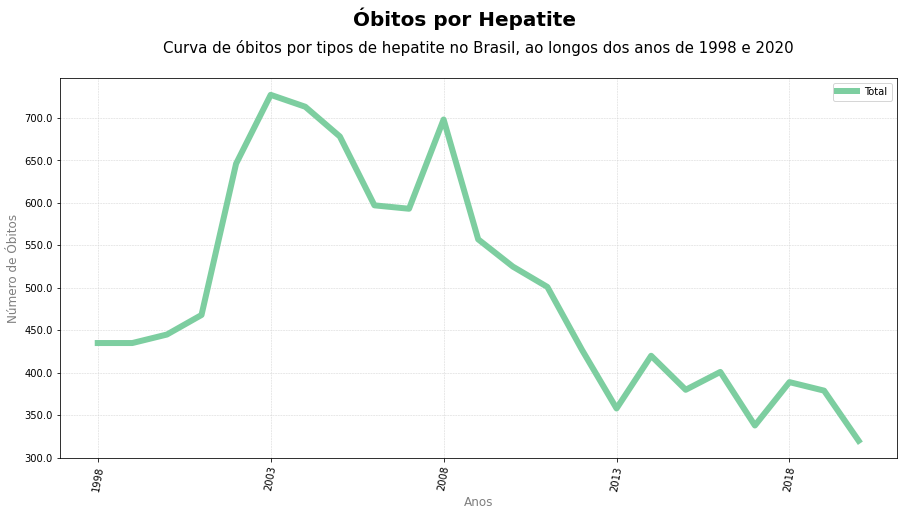

In [214]:
ax = total_obitos_por_ano.plot(y='Total',color="#7DCEA0", lw=6)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.suptitle("Óbitos por Hepatite", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Curva de óbitos por tipos de hepatite no Brasil, ao longos dos anos de 1998 e 2020', {'fontsize': 15}).set_position([.5, 1.05])

plt.ylabel("Número de Óbitos", size = 12, color='grey')
plt.xlabel("Anos", size = 12, color='grey')
plt.xticks(rotation=80)

plt.grid(color='lightgrey', linestyle='--', linewidth=.5)
plt.show()

O gráfico acima identifica o periódo entre os anos  de 2001, à 2008 como os mais críticos para óbitos relacionados à hepatites. Para uma melhor compreensão desse cenário, vamos analisar as curvas dos cinco estados com maiores números de óbitos nesse período, e tentar identificar algum ponto importante sobre como a hepatite afetou o sistema de saúde público.

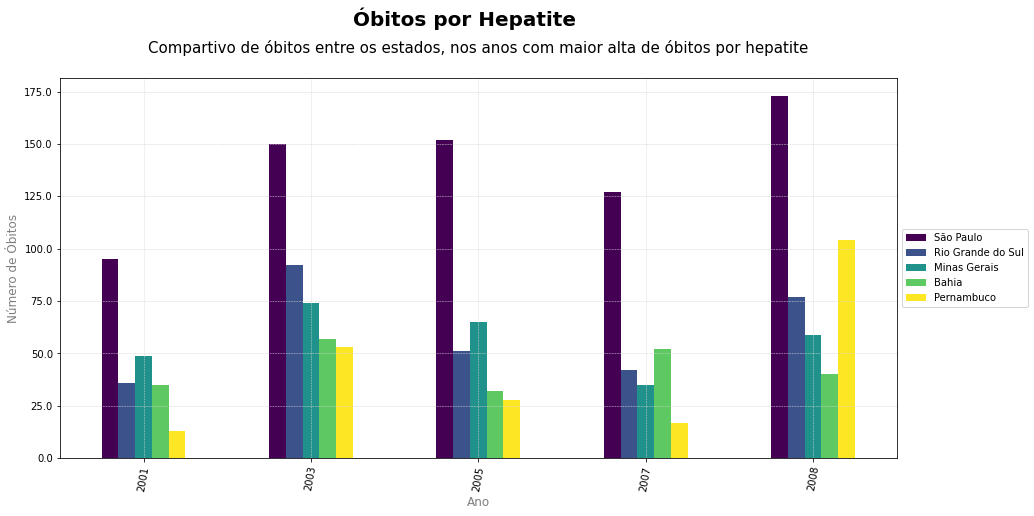

In [227]:
ax = obitos_hepatite[['2001','2003', '2005', '2007', '2008']].sort_values(by='2003', ascending=False).head().T.plot(kind='bar', colormap = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.suptitle("Óbitos por Hepatite", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Compartivo de óbitos entre os estados, nos anos com maior alta de óbitos por hepatite',{'fontsize': 15}).set_position([.5, 1.05])

plt.ylabel("Número de Óbitos", size = 12, color='grey')
plt.xlabel("Ano", size = 12, color='grey')
plt.xticks(rotation=80)
plt.grid(color='lightgrey', linestyle='--', linewidth=.5)
plt.show()

Identificamos São Paulo, Rio Grande do Sul, Minas Gerais, Bahia e Pernambuco como os estados com os números absolutos mais altos por óbitos relacionadas à hepatite. A tendência mais lógica é associarmos esse alto número de mortes com um aumento nos gastos dos hospitais da rede pública. O gráfico à seguir exibe a curva dos valores totais gastos, ao longo de 1998 e 2020, causados pelos óbitos do gráfico anterior, nos estados citados acima.  

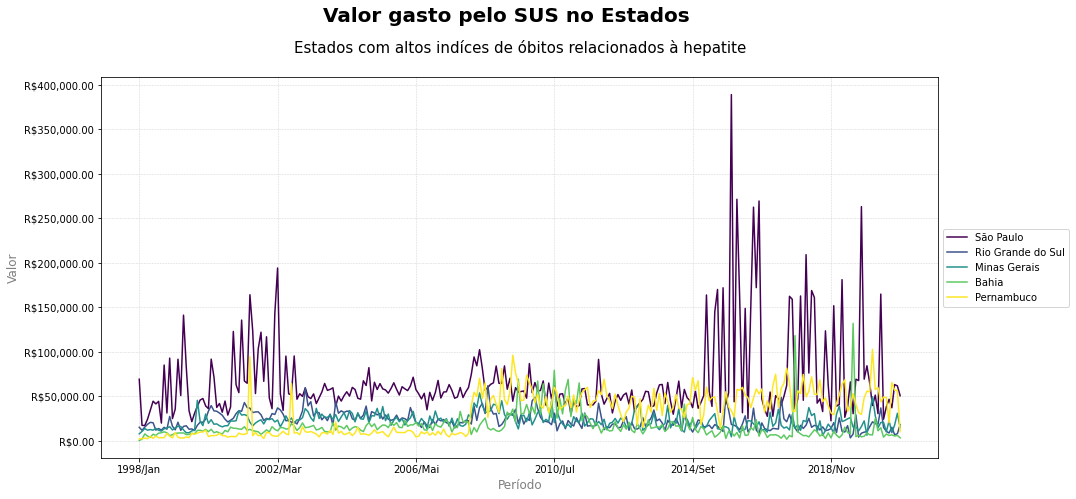

In [229]:
valor_obito_ate_2008 = valor_obitos_hepatite
valor_obito_ate_2008 = valor_obito_ate_2008.loc[['São Paulo', 'Rio Grande do Sul', 'Minas Gerais', 'Bahia','Pernambuco']]
valor_obito_ate_2008 = valor_obito_ate_2008.astype(float)

ax=valor_obito_ate_2008.T.plot(colormap = 'viridis')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))

plt.suptitle("Valor gasto pelo SUS no Estados", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Estados com altos indíces de óbitos relacionados à hepatite',{'fontsize': 15}).set_position([.5, 1.05])

plt.ylabel("Valor", size = 12, color='grey')
plt.xlabel("Período", size = 12, color='grey')
plt.grid(color='lightgrey', linestyle='--', linewidth=.5)

plt.show()

Ao analisar somente as curvas dos gastos dos cinco estados, podemos visualizar alguns picos onde os gastos foram acima do restante do período. 
Entretanto, os valores identificados, por exemplo, em novembro de 1998, podem ser os mesmo em grandezes absolutas que os registrados em janeiro de 2018 porém, ao realizar uma afirmação *incorreta*, de que os gastos se mantiveram inalterados, estaremos desconsiderando a inflação incidente ao longo de 20 anos. 
Sendo assim, para melhor entendimento do impacto desses valores, vamos analisar esses dados relacionando tamanho médio da população, do montante total gasto entre 1998 e 2020, e todas os óbitos registrados também neste período, pela base de 100 mil habitantes.

In [220]:
# Somando o valor total gasto com óbitos, em cada unidade da federação
obitos_detalhado = pd.DataFrame(valor_obitos_hepatite.T.sum())

# Renomeando coluna UNIDADE DA FEDERACAO e determinando esta nova coluna como indíce do dataframe
obitos_detalhado = obitos_detalhado.reset_index()
obitos_detalhado.columns = ['Unidade da Federação', 'Total Gasto com óbitos']
obitos_detalhado.set_index('Unidade da Federação', inplace=True)

# Criando as colunas TOTAL DE ÓBITOS e POPULACAO MÉDIA para cada unidade da federação
obitos_detalhado['Total de Óbitos'] = obitos_hepatite.T.sum()
obitos_detalhado['População Média'] = populacao_total.T.mean()

# Calculando GASTO ÓBITOS À CADA 100MIL HABITANTES e ÓBITOS À CADA 100MIL HABITANTES
obitos_detalhado['Gasto óbitos à cada 100mil Habitantes'] = (obitos_detalhado['Total Gasto com óbitos'] / obitos_detalhado['População Média']) * 100000
obitos_detalhado['Óbitos à cada 100mil Habitantes'] = (obitos_detalhado['Total de Óbitos'] / obitos_detalhado['População Média']) * 100000

# Ordenando os dados à partir da coluna GASTO ÓBITOS À CADA 100MIL HABITANTES
obitos_detalhado = obitos_detalhado.sort_values(by='Gasto óbitos à cada 100mil Habitantes', ascending=False)

# Exibição do resultado após configurações
obitos_detalhado

,Total Gasto com óbitos,Total de Óbitos,População Média,Gasto óbitos à cada 100mil Habitantes,Óbitos à cada 100mil Habitantes
Unidade da Federação,,,,,
Acre,2666297.16,466,715072.04,372871.12,65.17
Roraima,926698.43,37,438184.39,211485.95,8.44
Rondônia,1679899.42,232,1563569.09,107440.05,14.84
Pernambuco,8509312.71,1138,8713073.91,97661.43,13.06
Pará,6482084.48,488,7395681.74,87646.88,6.60
Amazonas,2651430.68,376,3436832.91,77147.50,10.94
Amapá,491447.06,48,652733.35,75290.63,7.35
Tocantins,793158.49,58,1359962.96,58322.07,4.26
Rio Grande do Sul,6242416.44,921,10814207.35,57724.22,8.52


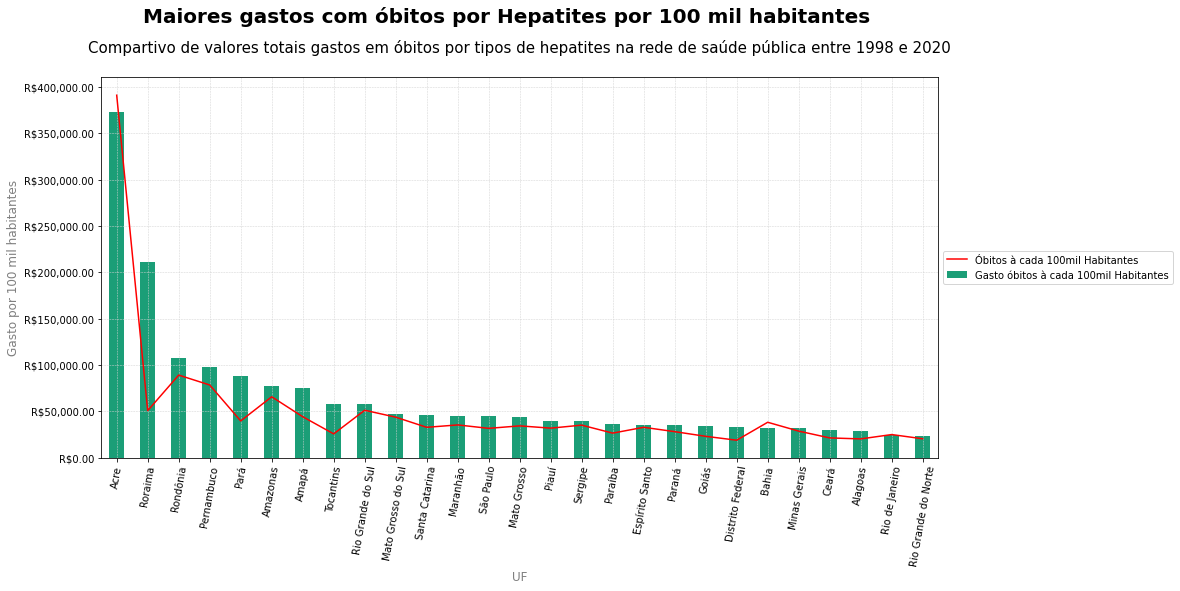

In [230]:
ax = (obitos_detalhado['Óbitos à cada 100mil Habitantes']*6000).plot(color='red') 
ax = obitos_detalhado['Gasto óbitos à cada 100mil Habitantes'].plot(kind='bar', colormap = 'Dark2')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('R${x:,.2f}'))

plt.suptitle("Maiores gastos com óbitos por Hepatites por 100 mil habitantes", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Compartivo de valores totais gastos em óbitos por tipos de hepatites na rede de saúde pública entre 1998 e 2020',{'fontsize': 15}).set_position([.5, 1.05])

plt.ylabel("Gasto por 100 mil habitantes", size = 12, color='grey')
plt.xlabel("UF", size = 12, color='grey')
plt.xticks(rotation=80)
plt.grid(color='lightgrey', linestyle='--', linewidth=.5)
plt.show()

Através do gráfico anterior, identificamos um padrão entre gastos totais com óbitos por hepatite à cada 100 mil habitantes e, os óbitos também na mesma base. Fica evidenciado como os variados tipos de hepatite impactaram os estados do Acre e de Roraima, tanto na sua população quanto aos recurso públicos. Portanto, analisar somente os gastos no período de maiores altas de óbitos (entre 2002 à 2008), não foi a melhor estratégia para avaliar o impacto da hepatite na população e no orçamento público, visto que São Paulo, Rio Grande do Sul e Minas Gerais, foram os que, em valores absolutos, tiveram maiores gastos com os óbitos e em números da casos.

Outro aspecto a ser considerado, é a vacinação contra hepatites virais do tipos A e B. À seguir, é exibido um análise similiar ao realizado acima, identificando quais os estados que mais vacinaram sua população.

In [223]:
vacina_detalhado = total_doses_por_uf
vacina_detalhado = vacina_detalhado.rename(columns={' Total': 'Total de vacinas aplicadas'})

vacina_detalhado['População Média'] = populacao_total.T.mean()
vacina_detalhado['Porcentagem da população vacinada'] = (vacina_detalhado['População Média']/vacina_detalhado['Total de vacinas aplicadas']) * 100

vacina_detalhado = vacina_detalhado.sort_values(by='Porcentagem da população vacinada', ascending=False)
vacina_detalhado

,Total de vacinas aplicadas,População Média,Porcentagem da população vacinada
Unidade da Federação,,,
Rio Grande do Sul,17697789,10814207.35,61.10
Rio de Janeiro,27736256,15823910.48,57.05
Minas Gerais,36484953,19578066.96,53.66
Piauí,5795318,3075657.87,53.07
Goiás,11308669,5956586.96,52.67
Paraíba,7186275,3724662.09,51.83
Rio Grande do Norte,6068998,3129926.65,51.57
Bahia,28399698,14064337.43,49.52
São Paulo,84161702,41377308.91,49.16


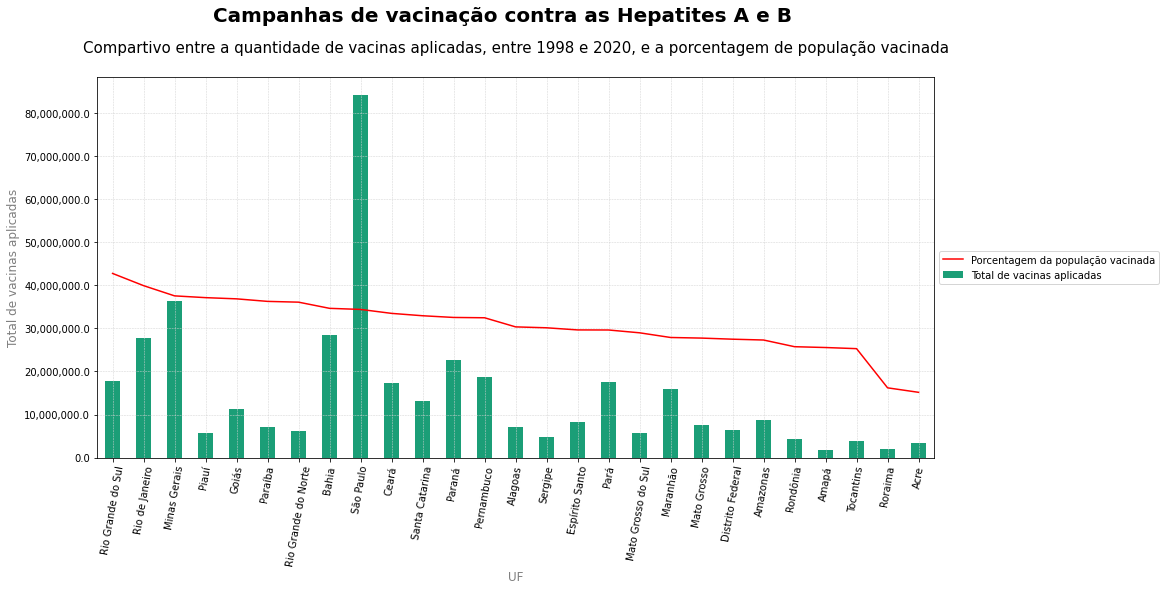

In [231]:
ax = (vacina_detalhado['Porcentagem da população vacinada']*700000).plot(color='red') 
ax = vacina_detalhado['Total de vacinas aplicadas'].plot(kind='bar', colormap = 'Dark2')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,}'))

plt.suptitle("Campanhas de vacinação contra as Hepatites A e B", size=20, weight='bold' ).set_position([.5, 1.02])
plt.title('Compartivo entre a quantidade de vacinas aplicadas, entre 1998 e 2020, e a porcentagem de população vacinada',{'fontsize': 15}).set_position([.5, 1.05])

plt.ylabel("Total de vacinas aplicadas", size = 12, color='grey')
plt.xlabel("UF", size = 12, color='grey')
plt.xticks(rotation=80)
plt.grid(color='lightgrey', linestyle='--', linewidth=.5)
plt.show()

Com os dados transpostos para o gráfico acima, é possível verificar que, o número absoluto de doses aplicadas somente, não identifica que a campanha de vacinação atingiu uma alta porcentagem da população. Se vericarmos a reta a cruza o gráfico e o dataframe gerado, identificamos que a imunização da população está entre 60% e 40% na maioria dos estados. Porém ao analisarmos os três estados com as piores taxas de imunização, encontramos Acre e Roraima, os mesmo dois estados onde o número de óbitos (e consequente, os valores gastos em despesas nos hospitais públicos) foram os mais altos encontrados na análise anterior. Entretanto, o estado que teve o maior índice de imunização contra hepatite (Rio Grande do Sul), figura entre os dez estados com alta despesa relacionados aos óbitos por hepatite. Em contra partida, Rio de Janeiro, o segundo estado proporcionalmente mais vacinou (57,05%), aparece como penúltimo na lista de maiores gastos hospitalares, com 4,15 mortes à cada 100 mil habitantes.

## **3. Conclusão**

É Importante salientar que seria necessário outros informações para entender como os vários tipos de hepatite podem afetar a mortalidade das pessoas em uma estado, citando alguns, dados genéticos que demonstrem a efetividade das vacinas em determinado grupo étnico, dados de campanhas estaduais e federais de prenvenção à hepatites virais, dados dos agentes públicos responsáveis por cobrir as macro e micro regiões determinadas pelo SUS, investimentos públicos nos estudos para elaboração de vacinas etc. 

De toda forma, com os dados apresentados acima, podemos identificar alguns pontos que podem ser utilizados durante outras processos de epidemia, demonstrando a importância da prevenção e vacinação como as melhores estratégias para redução de custos na rede pública de saúde.